In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
from matplotlib.patches import Wedge
from mpl_toolkits.mplot3d import Axes3D
import time
import warnings
from bfields import *
from efields import *
from plottools import *
from boris import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# colorscales for color consistency 
seq_standard = 'YlGnBu'
div_standard = 'RdGy'
#pcolor = 'GnBu'

# UNH logo hexcode
nh_blue = '#233E8A'
white = ['#FFFFFF']

# UNH-themed sequential colors
nh_blues = ['#152451', '#233E8A', '#3B62CE','#7C97DE','#BDCBEF','#DFE5F7','#EFF2FB']
nh_grays = ['#333333', '#575757', '#858585','#ADADAD','#D6D6D6','#EBEBEB','#F5F5F5']
nh_blues_r = nh_blues[::-1]
nh_grays_r = nh_grays[::-1]

# UNH-themed divergent colors
nh_cscale = nh_blues+white+nh_grays_r
nh_cscale_r = nh_cscale[::-1] 

nh_cmap_div = LinearSegmentedColormap.from_list('cdiv',nh_cscale,N=500)
nh_cmap_div_r = LinearSegmentedColormap.from_list('cdiv_r',nh_cscale_r,N=500)
nh_cmap_seq = LinearSegmentedColormap.from_list('cseq',nh_blues,N=500)
nh_cmap_seq_r = LinearSegmentedColormap.from_list('cseq_r',nh_blues_r,N=500)

# colorscale for sequential plots
cseq = nh_cmap_seq
cseq_r = nh_cmap_seq_r
# colorscale for divergent plots (negative and positive values)
cdiv = nh_cmap_div

# plot font
#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)



In [2]:
'''

constants

''' 
gs = 2.0            # shielding constant
RE = 6371000        # radius of earth [m]
mp = 1.6e-27        # proton mass [kg]
me = 9.1e-31        # electron mass [kg]
qe = 1.603E-19      # proton charge [C]

# kp index
kp = 8.5  
          
# mass of oxygen atom
mo = 2.656e-26 # [kg]

# given angles
theta1 = 2
phi1 = np.radians(69)

# energy
en = 40 # [keV]
en = en*1000 # [eV]
en = en*1.602176e-19 # [J] 

# velcoity magnitude
vmag = np.sqrt(2*en*(1/mo))


# velcoity components
vx = vmag*np.sin(theta1)*np.cos(phi1)
vy = vmag*np.sin(theta1)*np.sin(phi1)
vz = vmag*np.cos(theta1)

nhr = 0.05
dt = 0.05
tf = nhr*3600

# creating charged particle
m = 4.*mp
q = 2.*qe


# set initial conditions                            
#r0 = np.array([4.3, -2., 2.])*RE 
#v0 = np.array([vx , vy, vz])

r0 = np.array([1., -7.85, -1.53])*RE
v0 = np.array([0.,.3,.3])

# compute boris
tdat, tdrift, vdat, rdat, emag = boris(tf, r0, v0, m, q, gs, kp, tdir="bw", sph=False)


6000
tdat = 0.0


* drift time: nan hrs
* Initial position: (0.9999999999999992, -7.850000000000001, -1.5299999999999985) RE
* Initial vel|ocity: (0.4242640687119285, 0.7853981633974484, 1.5707963267948966) m/s
* Duration: 180.0 s (3.0 min.)
* E-field: 0.00e+00 mV/m (mean), 0.00e+00 mV/m (max), 0.00e+00 mV/m (min) 


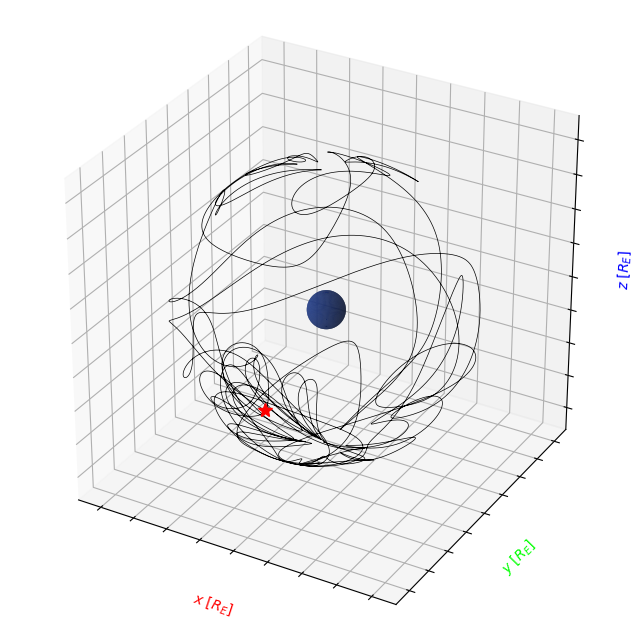

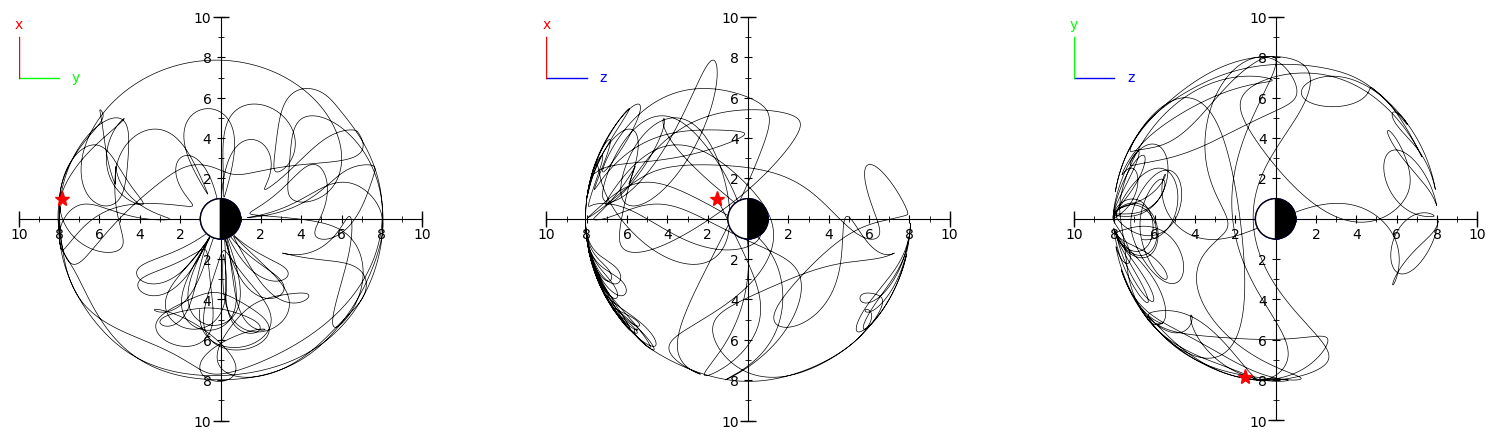

In [3]:
# convert spherical position coordinates to cartesian
rdat_crt = np.zeros((len(rdat), 3))
for i, val in enumerate(rdat):
    x,y,z = sph_to_crt(val[0], val[1], val[2])
    rdat_crt[i] = np.array([x,y,z])


# scale coordinates in units [RE]  
rscale = rdat_crt/RE

tracingplot_3d(rdat_crt, savefig=False)
tracingplot_2d(rdat_crt, savefig=False)


# diagnostic data
print(f'* drift time: {tdrift} hrs')
print(f'* Initial position: {rscale[0][0], rscale[0][1], rscale[0][2]} RE')
print(f'* Initial vel|ocity: {vdat[0][0], vdat[0][1], vdat[0][2]} m/s')
print(f'* Duration: {tf} s ({round(tf/60,2)} min.)')
print(f'* E-field: {np.mean(emag):.2e} mV/m (mean), {max(emag):.2e} mV/m (max), {min(emag):.2e} mV/m (min) ')

plt.show() 
